# Mobiles Dataset (2025) SVR

## Libraries

In [67]:
import pandas as pd
from sklearn.preprocessing import TargetEncoder, StandardScaler
from sklearn.feature_selection import mutual_info_regression, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

## Preprocessing

### The dataset

In [68]:
data = pd.read_csv("../CSVs Cleaned/Cleaned Mobiles Dataset (2025).csv")
print(data.head())
y = data['price']

  Company Name  Mobile Weight  RAM   Processor  Battery Capacity  Screen Size  \
0        Apple          174.0  6.0  A17 Bionic              3600          6.1   
1        Apple          174.0  6.0  A17 Bionic              3600          6.1   
2        Apple          174.0  6.0  A17 Bionic              3600          6.1   
3        Apple          203.0  6.0  A17 Bionic              4200          6.7   
4        Apple          203.0  6.0  A17 Bionic              4200          6.7   

   Launched Year  Back Camera 1  Back Camera 2  Back Camera 3  Back Camera 4  \
0           2024             48              0              0              0   
1           2024             48              0              0              0   
2           2024             48              0              0              0   
3           2024             48              0              0              0   
4           2024             48              0              0              0   

   Front Camera 1  Front Camera 

Using TargetEncoder to encode categorical features

In [69]:
encoder = TargetEncoder(target_type="continuous")
data['Company Name_encoded'] = encoder.fit_transform(data[['Company Name']], y)
data['Processor_encoded'] = encoder.fit_transform(data[['Processor']], y)

del data['Company Name']
del data['Processor']

print(data.head())

   Mobile Weight  RAM  Battery Capacity  Screen Size  Launched Year  \
0          174.0  6.0              3600          6.1           2024   
1          174.0  6.0              3600          6.1           2024   
2          174.0  6.0              3600          6.1           2024   
3          203.0  6.0              4200          6.7           2024   
4          203.0  6.0              4200          6.7           2024   

   Back Camera 1  Back Camera 2  Back Camera 3  Back Camera 4  Front Camera 1  \
0             48              0              0              0              12   
1             48              0              0              0              12   
2             48              0              0              0              12   
3             48              0              0              0              12   
4             48              0              0              0              12   

   Front Camera 2  Storage  price  Company Name_encoded  Processor_encoded  
0        

Drop samples with empty columns and separate features from target feature, price. Then select the top 10 features based on their mutual information (nat) score.

In [ ]:
data = data.dropna()

y = data['price']
X = data.drop('price', axis=1)

mutual_info = mutual_info_regression(X, y)

# Create a DataFrame for better visualization
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': mutual_info,
}).sort_values(by='Score', ascending=False)

# Display the feature importance scores
print(feature_scores)

select = SelectKBest(mutual_info_regression, k=10).fit(X, y)
X = select.transform(X)
print(f"\nSelected Features: {select.get_feature_names_out()}")

                 Feature     Score
13     Processor_encoded  0.907515
9         Front Camera 1  0.472527
6          Back Camera 2  0.402601
2       Battery Capacity  0.359628
3            Screen Size  0.356845
11               Storage  0.330968
12  Company Name_encoded  0.319453
1                    RAM  0.315627
0          Mobile Weight  0.297944
5          Back Camera 1  0.267613
7          Back Camera 3  0.147353
4          Launched Year  0.051321
8          Back Camera 4  0.034411
10        Front Camera 2  0.000000

Selected Features: ['Mobile Weight' 'RAM' 'Battery Capacity' 'Screen Size' 'Back Camera 1'
 'Back Camera 2' 'Front Camera 1' 'Storage' 'Company Name_encoded'
 'Processor_encoded']


## Training and testing

Scaling features

In [71]:
sc_X = StandardScaler()
sc_y = StandardScaler()
scaled_X = sc_X.fit_transform(X)
scaled_y = sc_y.fit_transform(y.to_numpy().reshape(-1, 1))

Split the dataset into test data and training data

In [72]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_y, test_size=0.4)

Fit the training data to the model, and test by performing predictions on the test data

In [73]:
regressor = SVR()
regressor.fit(X_train, y_train)

pred = regressor.predict(X_test)
pred = pd.DataFrame(pred)

# Revert scaled values to price information
predicted_price = sc_y.inverse_transform(pred)
real_price = sc_y.inverse_transform(y_test)

c:\Users\andre\Documents\GitHub\Mobile-Phone-Price-Prediction\.venv\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Summarize performance

Train coeff of determination: 0.9163406558988458
Test coeff of determination: 0.8483936586672733
MAE: $91.12618099646448
MAPE: 0.1755743830200237


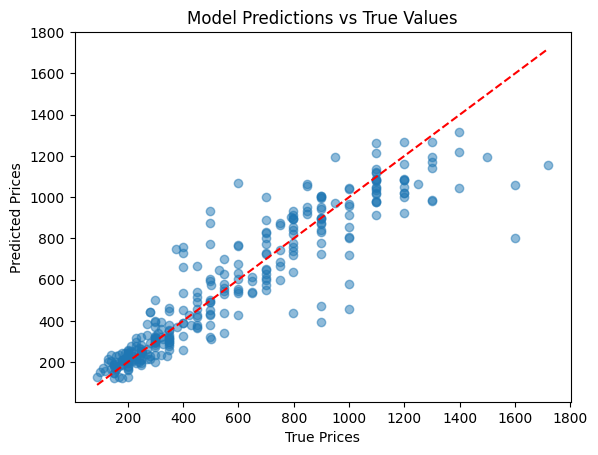

In [74]:
print(f"Train coeff of determination: {regressor.score(X_train, y_train)}")
print(f"Test coeff of determination: {regressor.score(X_test, y_test)}")
print(f"MAE: ${mean_absolute_error(real_price, predicted_price)}")
print(f"MAPE: {mean_absolute_percentage_error(real_price, predicted_price)}")

import matplotlib.pyplot as plt
plt.scatter(real_price, predicted_price, alpha=0.5)
plt.plot([min(real_price), max(real_price)], [min(real_price), max(real_price)], 'r--')
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("Model Predictions vs True Values")
plt.show()